![](photo.png)

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [629]:
## loading the datasets
link1 ='https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv'
link2 = 'https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv'

In [630]:
data_train = pd.read_csv(link1)

In [631]:
data_test = pd.read_csv(link2)

In [632]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [633]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [634]:
data_train.shape

(8523, 12)

In [635]:
data_test.shape

(5681, 11)

####  Using the data_train.shape we can see the shape our datasets.
#### For the train dataset we have 8523 rows(records) and 12 columns(attributes)
#### For the test dataset we have 5681 rows(records) and 11 columns(attributes)


## From the above problem statement we have to build a predictive model to find the sales of a product at each particular store.
## Since __Item_Outlet_Sales the target (label)__ has  continous data we can Assume that we have a linear Regression problem.

In [636]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### The info() method give us  some important informations about each column of the dataset like : "Non-Null Count",the data type(Dtype) and show each column index.

In [637]:
## I will delete the column Item_Identifier because it is Id the column and has nominal data.

data_train.drop('Item_Identifier',axis=1,inplace=True)

In [638]:
## I am doing the for test data

data_test.drop('Item_Identifier',axis=1,inplace=True)

#### I  deleted the column Item_Identifier because it is Id of the column and has nominal data.


In [639]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### The describe method give us some statistics distribution of the numerical column and show that only 5 column have numerical data.
#### It shows all the count of each column and the quantitles as well.

## We will seperate our train dataset into two , numerical data and non-numerical data and concatinate them after cleaned them.

In [640]:
non_num_data = data_train.drop(data_train.describe().columns,axis=1)

In [641]:
non_num_data

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [642]:
non_num_data.shape

(8523, 6)

In [643]:
num_data = data_train.drop(non_num_data,axis=1)

In [644]:
num_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [108]:
num_data.shape[1]

5

## We can see that after seperating them the numerical data is 5 cloumn and non-numercial data is 6 column.

# *********************************************

# First, let's the deal with the numerical data.


In [109]:
num_data.isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

####  we can see only the Item_Weight column have 1463 missing values.

#### Let's fill the missing values in Item_Weight  cloumn

In [645]:
## The Item_Weight column has numerical values son will fill the NAN values unsing KNNImputer.
# importing the libraries..

from sklearn.impute import KNNImputer
knn_ipm = KNNImputer(n_neighbors=4)


In [646]:
df = knn_ipm.fit_transform(num_data[['Item_Visibility','Item_Weight']])

In [647]:
df

array([[1.60473010e-02, 9.30000000e+00],
       [1.92782160e-02, 5.92000000e+00],
       [1.67600750e-02, 1.75000000e+01],
       ...,
       [3.51862710e-02, 1.06000000e+01],
       [1.45220646e-01, 7.21000000e+00],
       [4.48782800e-02, 1.48000000e+01]])

In [648]:
## Now let's update the Item_Weight column with new values after inputing.

num_data['Item_Weight'] = df[:,1]

In [649]:
## Now let verify it.

num_data['Item_Weight'].isna().sum()

0

In [115]:
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


#### Knn imputer will try to find the relation with Item_Weight and Item_Weight  column and impute the data according the relaton with other columns

# *********************************************

# Secondly, let's the deal with the non-numerical data.


In [650]:
non_num_data.isna().sum()

Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

####  we can see only the __Outlet_Size__ column have 2410 missing values. Which is less than 40% of record so we cannot delete it.

In [651]:
non_num_data.Outlet_Size.unique() 

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [652]:
non_num_data.Outlet_Size.value_counts() 

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

#### for these columns i will fill them using forward fill because there are some kind balance for the value_counts (Medium,Small) .

In [653]:
non_num_data['Outlet_Size'] = non_num_data.fillna(method="ffill")

In [654]:
## let's verify it.

non_num_data.isna().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [121]:
non_num_data

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Low Fat,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Regular,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Low Fat,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,Regular,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,Low Fat,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,OUT013,Low Fat,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,OUT045,Regular,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,OUT035,Low Fat,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,OUT018,Regular,Tier 3,Supermarket Type2


In [655]:
## let's see the unique class of each column.

for i in non_num_data:
    print(non_num_data[i].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


#### We have two kind of Categorical: Categorical __unscalable__ and Categorical __scalable.__

#### __So let's seperate non_num_data into two them and  apply deffrent Encoder method to them.__

In [656]:
unscalable = non_num_data.drop(['Outlet_Location_Type','Outlet_Type'],axis=1)

In [657]:
unscalable.head(3)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size
0,Low Fat,Dairy,OUT049,Low Fat
1,Regular,Soft Drinks,OUT018,Regular
2,Low Fat,Meat,OUT049,Low Fat


In [658]:
scalable = non_num_data.drop(unscalable,axis=1)

In [659]:
scalable.head(3)

,Outlet_Location_Type,Outlet_Type
0,Tier 1,Supermarket Type1
1,Tier 3,Supermarket Type2
2,Tier 1,Supermarket Type1


## scalable or measurable data

#### we have the columns: 'Outlet_Location_Type' and 'Outlet_Type'

#### let's  encoder them using __OrdinalEncoder.__

In [127]:
## importing the libraries

from sklearn.preprocessing import OrdinalEncoder


In [660]:
ord_enc = OrdinalEncoder(categories= [['Tier 3','Tier 2','Tier 1'],
    ['Grocery Store','Supermarket Type3','Supermarket Type2','Supermarket Type1']
])

In [661]:
df_encoded = ord_enc.fit_transform(scalable[['Outlet_Location_Type','Outlet_Type']])

In [662]:
df_encoded

array([[2., 3.],
       [0., 2.],
       [2., 3.],
       ...,
       [1., 3.],
       [0., 2.],
       [2., 3.]])

In [663]:
#### Let's update the scalable  with the new numerical data after Encodered

scalable[['Outlet_Location_Type','Outlet_Type']] = df_encoded 

In [664]:
scalable.head(3)

,Outlet_Location_Type,Outlet_Type
0,2.0,3.0
1,0.0,2.0
2,2.0,3.0


#### We have done the scalable data .

### ***************

## unscalable or unmeasurable data.

In [133]:
unscalable.head(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size
0,Low Fat,Dairy,OUT049,Low Fat
1,Regular,Soft Drinks,OUT018,Regular


## For unscalable data i will encoder them using __LabelEncoder__ method.

In [134]:
## import the libraries
from sklearn.preprocessing import LabelEncoder

In [666]:
lb_enc= LabelEncoder()

In [667]:
for i in unscalable.columns:
    unscalable[i] = lb_enc.fit_transform(unscalable[i])
    

In [668]:
## let's verify

unscalable.head(3)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size
0,1,4,9,1
1,2,14,3,2
2,1,10,9,1


#### We have done the unscalable data .

### __Now let's conactinate the unscalable data and scalable data to a single dataset__

In [669]:
num_data2 = pd.concat([unscalable,scalable],axis=1)


In [670]:
num_data2.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,4,9,1,2.0,3.0
1,2,14,3,2,0.0,2.0
2,1,10,9,1,2.0,3.0
3,2,6,0,2,0.0,0.0
4,1,9,1,1,0.0,3.0


## __Finally let's conactinate the first numerical data  (num_data) and the second numerical data(num_data2) to a single dataset__ called __clean_data__.

In [671]:
clean_data = pd.concat([num_data2,num_data],axis=1)

In [672]:
clean_data.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,1,4,9,1,2.0,3.0,9.30,0.016047,249.8092,1999,3735.1380
1,2,14,3,2,0.0,2.0,5.92,0.019278,48.2692,2009,443.4228
2,1,10,9,1,2.0,3.0,17.50,0.016760,141.6180,1999,2097.2700
3,2,6,0,2,0.0,0.0,19.20,0.000000,182.0950,1998,732.3800
4,1,9,1,1,0.0,3.0,8.93,0.000000,53.8614,1987,994.7052


In [673]:
clean_data.shape

(8523, 11)

### let's save it.

In [674]:
clean_data.to_csv('cleaned_train.csv',index=False)

### Now our train tata is cleaned and it has 8523 rows and 12 column.

## ***************************************************************************
## ***************************************************************************
## ***************************************************************************

## __Now our second work is to apply the same cleaning method to our test dataset and save it as .csv file.__

In [675]:
data_test.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [676]:
non_num_data_test = data_test.drop(data_test.describe().columns,axis=1)

In [677]:
non_num_data_test.head(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,reg,Dairy,OUT017,NaN,Tier 2,Supermarket Type1


In [678]:
num_data_test = data_test.drop(non_num_data_test,axis=1)

In [679]:
num_data_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750,0.007565,107.8622,1999
1,8.300,0.038428,87.3198,2007
2,14.600,0.099575,241.7538,1998
3,7.315,0.015388,155.0340,2007
4,NaN,0.118599,234.2300,1985
...,...,...,...,...
5676,10.500,0.013496,141.3154,1997
5677,7.600,0.142991,169.1448,2009
5678,10.000,0.073529,118.7440,2002
5679,15.300,0.000000,214.6218,2007


In [680]:
## checking for missing values

num_data_test.isna().sum()


Item_Weight                  976
Item_Visibility                0
Item_MRP                       0
Outlet_Establishment_Year      0
dtype: int64

In [681]:
df_test = knn_ipm.fit_transform(num_data_test[['Item_MRP','Item_Weight']])


In [682]:
df_test

array([[107.8622,  20.75  ],
       [ 87.3198,   8.3   ],
       [241.7538,  14.6   ],
       ...,
       [118.744 ,  10.    ],
       [214.6218,  15.3   ],
       [ 79.796 ,   9.5   ]])

In [683]:
## Now let's update the Item_Weight column with new values after inputing.

num_data_test['Item_Weight'] = df_test[:,1]

In [684]:
num_data_test.isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

## Secondly, let's the deal with the non-numerical data.


In [685]:
non_num_data_test.isna().sum()

Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [686]:
non_num_data_test['Outlet_Size'] = non_num_data_test.fillna(method="ffill")

In [687]:
non_num_data_test.isna().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [688]:
non_num_data_test.head(3)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Snack Foods,OUT049,Low Fat,Tier 1,Supermarket Type1
1,reg,Dairy,OUT017,reg,Tier 2,Supermarket Type1
2,Low Fat,Others,OUT010,Low Fat,Tier 3,Grocery Store


In [689]:
## let's see the unique class of each column.

for i in non_num_data_test:
    print(non_num_data_test[i].unique())

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']
['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
['Tier 1' 'Tier 2' 'Tier 3']
['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


In [690]:
unscalable_test = non_num_data_test.drop(['Outlet_Location_Type','Outlet_Type'],axis=1)

In [691]:
unscalable_test.shape

(5681, 4)

In [692]:
scalable_test = non_num_data_test.drop(unscalable_test,axis=1)

In [693]:
scalable_test.shape

(5681, 2)

### scalable_test

In [694]:
ord_enc1 = OrdinalEncoder(categories= [['Tier 3','Tier 2','Tier 1'],
    ['Grocery Store','Supermarket Type3','Supermarket Type2','Supermarket Type1']
])

In [695]:
df_encoded1 = ord_enc1.fit_transform(scalable_test[['Outlet_Location_Type','Outlet_Type']])

In [696]:
df_encoded1

array([[2., 3.],
       [1., 3.],
       [0., 0.],
       ...,
       [1., 3.],
       [1., 3.],
       [1., 3.]])

In [697]:
#### Let's update the scalable  with the new numerical data after Encodered

scalable_test[['Outlet_Location_Type','Outlet_Type']] = df_encoded1 

In [698]:
scalable_test.head(2)

,Outlet_Location_Type,Outlet_Type
0,2.0,3.0
1,1.0,3.0


## unscalable_test

In [699]:
for i in unscalable_test.columns:
    unscalable_test[i] = lb_enc.fit_transform(unscalable_test[i])

In [700]:
unscalable_test.head(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size
0,1,13,9,1
1,4,4,2,4


### __Now let's conactinate the unscalable_test data and scalable_test data to a single dataset__

In [701]:

num_data2_test = pd.concat([unscalable_test,scalable_test],axis=1)

## __Finally let's conactinate the first numerical data  (num_data_test) and the second numerical data(num_data2_test) to a single dataset__ called __clean_data_test__.

In [702]:
clean_data_test = pd.concat([num_data2_test,num_data_test],axis=1)

In [703]:
clean_data_test.head(5)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1,13,9,1,2.0,3.0,20.7500,0.007565,107.8622,1999
1,4,4,2,4,1.0,3.0,8.3000,0.038428,87.3198,2007
2,1,11,0,1,0.0,0.0,14.6000,0.099575,241.7538,1998
3,1,13,2,1,1.0,3.0,7.3150,0.015388,155.0340,2007
4,2,4,5,2,0.0,1.0,13.1225,0.118599,234.2300,1985


In [704]:
clean_data_test.shape

(5681, 10)

### Now our test data is cleaned and it has 5681 rows and 10 column.

### let's save our clean_data_test 

In [705]:
clean_data_test.to_csv('test_data_cleaned.csv',index=False)

## ***************************************************************************
## ***************************************************************************

## Now let's analize again  our train data by using some plotting graph

In [706]:
## let's import our clean data

clean_data = pd.read_csv('cleaned_train.csv')

In [707]:
clean_data.head(5)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,1,4,9,1,2.0,3.0,9.30,0.016047,249.8092,1999,3735.1380
1,2,14,3,2,0.0,2.0,5.92,0.019278,48.2692,2009,443.4228
2,1,10,9,1,2.0,3.0,17.50,0.016760,141.6180,1999,2097.2700
3,2,6,0,2,0.0,0.0,19.20,0.000000,182.0950,1998,732.3800
4,1,9,1,1,0.0,3.0,8.93,0.000000,53.8614,1987,994.7052


In [708]:
clean_data.shape

(8523, 11)

In [709]:
clean_data.describe()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,1.369354,7.226681,4.722281,1.369354,0.887129,2.290508,12.837163,0.066132,140.992782,1997.831867,2181.288914
std,0.644810,4.209990,2.837201,0.644810,0.812757,1.089985,4.373611,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,1.000000,4.000000,2.000000,1.000000,0.000000,2.000000,9.195000,0.026989,93.826500,1987.000000,834.247400
50%,1.000000,6.000000,5.000000,1.000000,1.000000,3.000000,12.641250,0.053931,143.012800,1999.000000,1794.331000
75%,2.000000,10.000000,7.000000,2.000000,2.000000,3.000000,16.350000,0.094585,185.643700,2004.000000,3101.296400
max,4.000000,15.000000,9.000000,4.000000,2.000000,3.000000,21.350000,0.328391,266.888400,2009.000000,13086.964800


### We can see that our data have only numerical values and there no missing values any more from the count of each column.

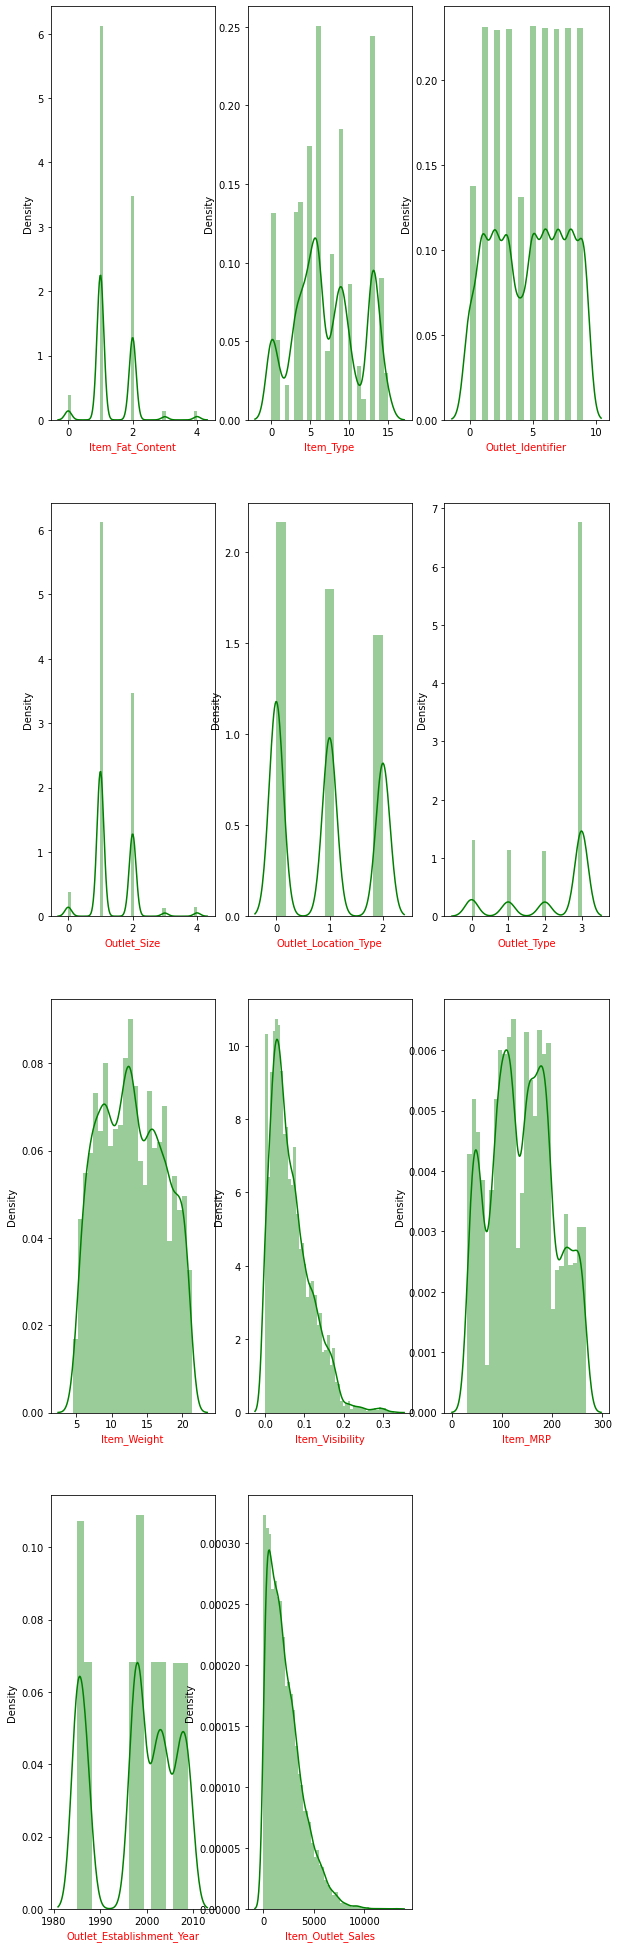

In [710]:
plt.figure(figsize=(10, 35))

graph = 1

for column in clean_data:
    if graph <= 11:
        ax = plt.subplot(4,3,graph)
        sns.distplot(clean_data[column],color='green')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()

### From distplot we can see our data is distributed visually in each column and It show also the skewness of some columns like "Item_Visibility".

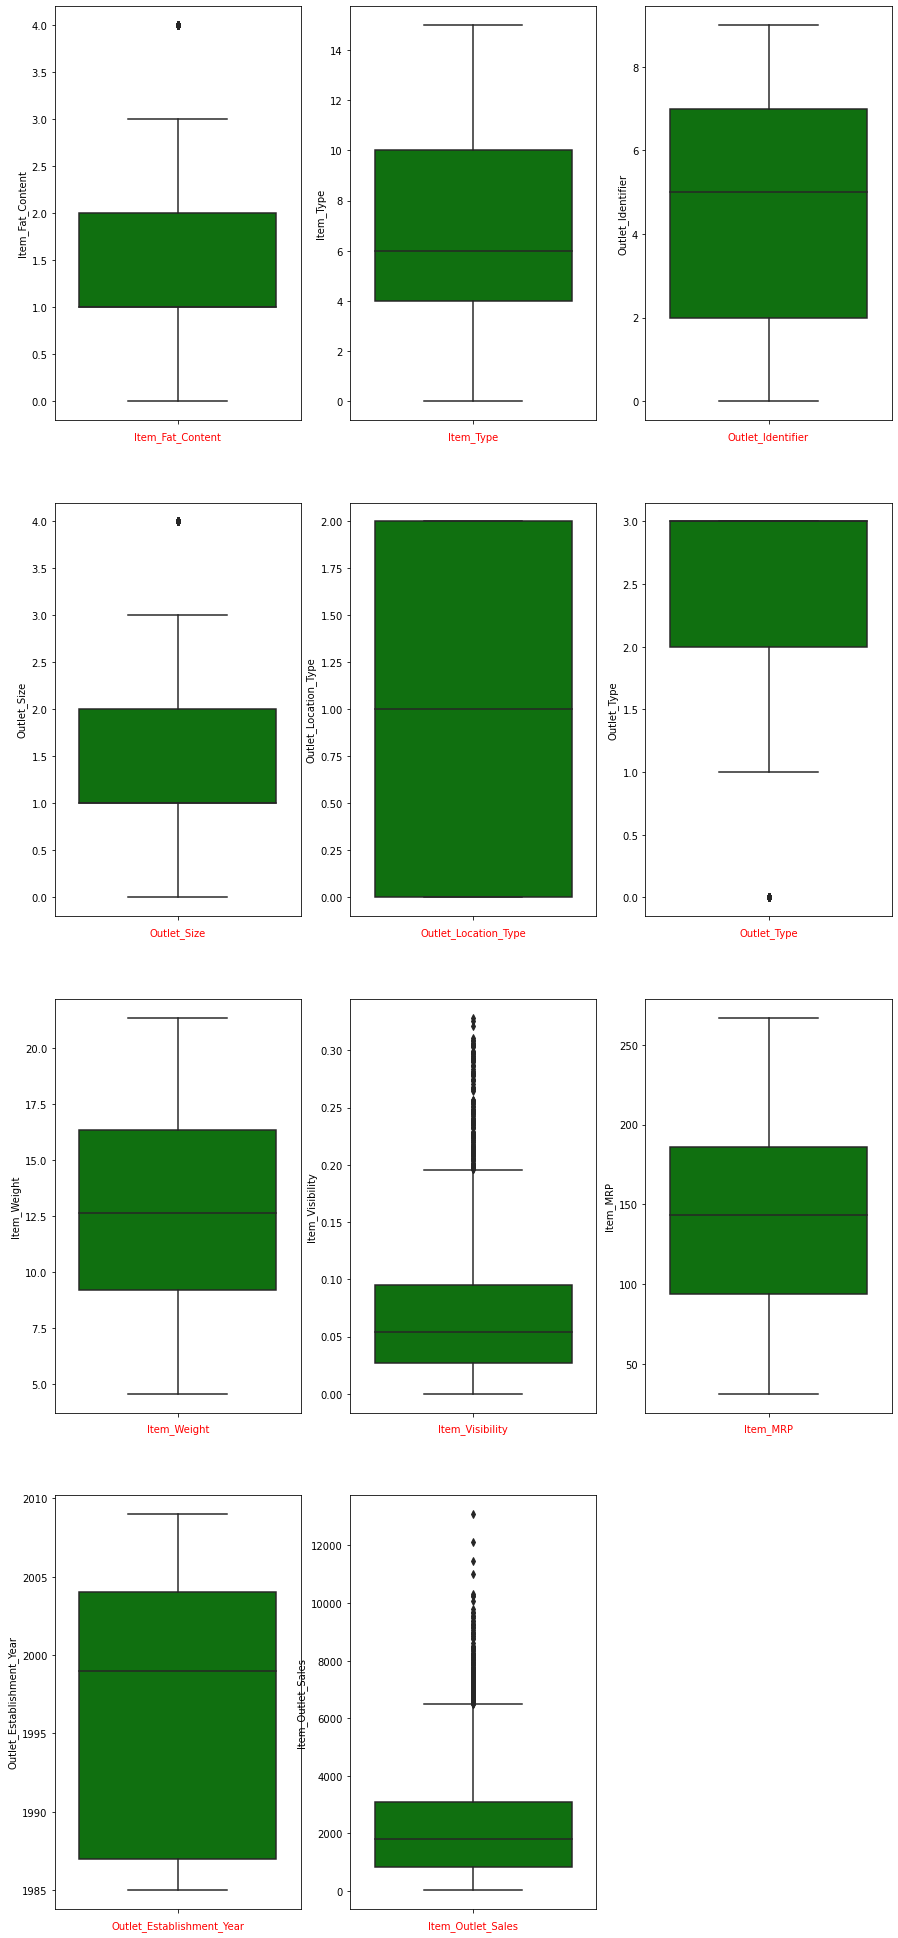

In [711]:
## let's check our data with box plot.

plt.figure(figsize=(15, 35))

graph = 1

for column in clean_data:
    if graph <= 11:
        ax = plt.subplot(4,3,graph)
        sns.boxplot(y = clean_data[column],orient='h',color='green')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()

#### From the boxplot we see that there outliers in some columns and there are:
#### [Item_Visibility, Item_Fat_Content, Outlet_Size and Outlet_Type] but not much and the target varibale outlet_Sales.

In [712]:
## let's seperate our dataset into label and features

X = clean_data.drop(['Item_Outlet_Sales'],axis=1)
y = clean_data.Item_Outlet_Sales

In [713]:
X.shape

(8523, 10)

### __Let's plot the scatter plot and check the relationship between our label data and features.__


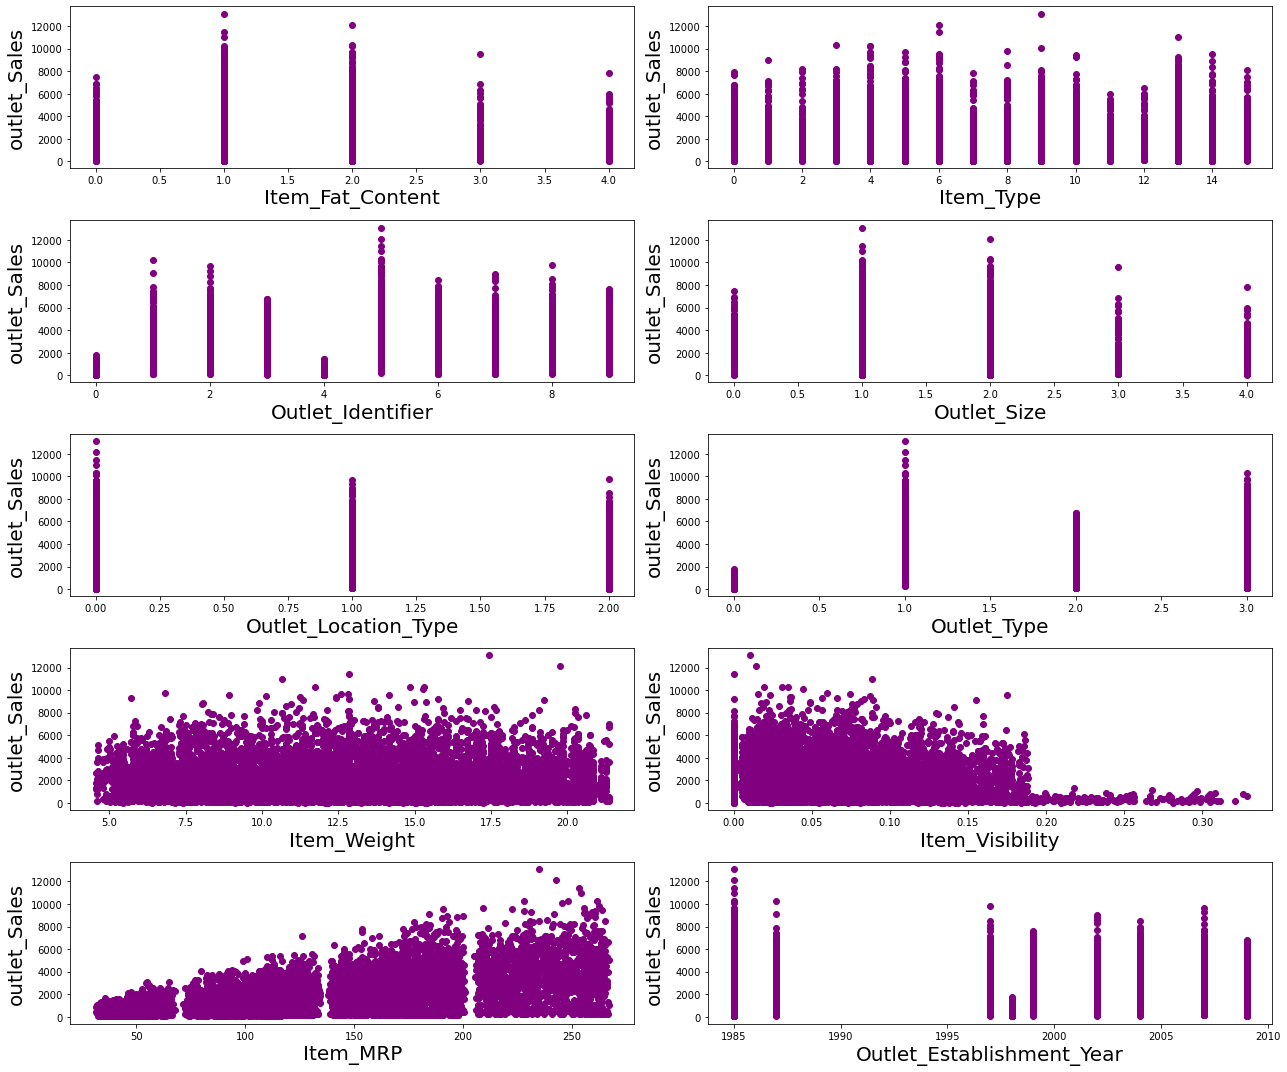

In [714]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber = 1
for column in X:
    if plotnumber <=10 :
        ax = plt.subplot(5,2, plotnumber)
        plt.scatter(X[column],y, color ='purple')
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('outlet_Sales', fontsize = 20)        
    plotnumber+=1
plt.tight_layout()

## From this sactter plot we can see that there fairly linear relatioship between our label and the features.
## __Since there fairly linear relatioship with label and features we say that our above Hypothesis is verified__.

## ***************************************************************************
## ***************************************************************************

# Now let build some Models

## First model with __LinearRegression__ Algorithum.

In [775]:
## import some important libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics


In [776]:
## let's seperate our dataset into label and features

X = clean_data.drop(['Item_Outlet_Sales'],axis=1)
Y = clean_data.Item_Outlet_Sales

In [777]:
## let's standarize our features data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [778]:
X_scaled

array([[-0.57128979, -0.76821445,  1.48931384, ..., -1.01927283,
         1.79912796,  0.10985288],
       [ 0.97652015,  1.60956453, -0.61980375, ..., -0.94946348,
        -1.47620462,  1.31664373],
       [-0.57128979,  0.65845294,  1.48931384, ..., -1.00387215,
         0.04085584,  0.10985288],
       ...,
       [-0.57128979,  0.18289715,  0.43475504, ..., -0.60574318,
        -0.87728388,  0.7132483 ],
       [ 0.97652015,  1.37178664, -0.61980375, ...,  1.77173463,
        -0.58458089,  1.31664373],
       [-0.57128979,  1.60956453,  1.13779424, ..., -0.39633102,
        -1.03419886, -0.13150529]])

### Now let's split our feature data

In [779]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.25,random_state=144)

In [780]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#### Let's predict the test set.

In [781]:
y_predlr = lr.predict(x_test)

In [782]:
y_predlr

array([1586.36192213, 2005.40670544, 3701.5358566 , ..., 1904.64242725,
       2159.72821556, 2180.95646528])

#### Now let's Evaluate the model.

In [783]:
mean_absolute_error(y_test,y_predlr)


842.0831369281011

In [784]:
print('\n*****Accuracy ****\n')

print(metrics.r2_score(y_test, y_predlr))


*****Accuracy ****

0.4803272354209145


#### Since the accuracy is too low(Accuracy: 48%) 

## Let's used SelectKBest feature Selection method and select the best features

In [785]:
from sklearn.feature_selection import SelectKBest, f_classif


In [890]:
best_features = SelectKBest(score_func= f_classif, k=10)

fit = best_features.fit(X,Y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [891]:
# Concatinate DataFrames

features_scores = pd.concat([df_columns, df_scores],axis=1)
features_scores.columns = ['Feature_Name','Score'] # naming output columns
print(features_scores.nlargest(10,'Score')) # print 17 best features

                Feature_Name     Score
8                   Item_MRP  3.420407
5                Outlet_Type  2.558202
2          Outlet_Identifier  1.209103
1                  Item_Type  1.200890
9  Outlet_Establishment_Year  1.180517
7            Item_Visibility  1.164365
0           Item_Fat_Content  1.103743
3                Outlet_Size  1.103743
6                Item_Weight  1.091410
4       Outlet_Location_Type  1.049512


#### These are the best features.

In [892]:
new_X = clean_data[['Item_MRP','Outlet_Type','Outlet_Identifier','Item_Type','Outlet_Establishment_Year','Item_Visibility','Item_Fat_Content','Outlet_Size','Item_Weight','Outlet_Location_Type']]
                    
                    

In [893]:
new_X

,Item_MRP,Outlet_Type,Outlet_Identifier,Item_Type,Outlet_Establishment_Year,Item_Visibility,Item_Fat_Content,Outlet_Size,Item_Weight,Outlet_Location_Type
0,249.8092,3.0,9,4,1999,0.016047,1,1,9.300,2.0
1,48.2692,2.0,3,14,2009,0.019278,2,2,5.920,0.0
2,141.6180,3.0,9,10,1999,0.016760,1,1,17.500,2.0
3,182.0950,0.0,0,6,1998,0.000000,2,2,19.200,0.0
4,53.8614,3.0,1,9,1987,0.000000,1,1,8.930,0.0
...,...,...,...,...,...,...,...,...,...,...
8518,214.5218,3.0,1,13,1987,0.056783,1,1,6.865,0.0
8519,108.1570,3.0,7,0,2002,0.046982,2,2,8.380,1.0
8520,85.1224,3.0,6,8,2004,0.035186,1,1,10.600,1.0
8521,103.1332,2.0,3,13,2009,0.145221,2,2,7.210,0.0


In [894]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(new_X)

### Let's  building the model with the selected features

In [895]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,Y,test_size=0.30,random_state=55)

In [896]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [897]:
y_predLR = LR.predict(x_test)

#### Now let's Evaluate the model.

In [898]:
mean_absolute_error(y_test,y_predLR)


852.8676213420816

In [899]:
print('\n*****Accuracy ****\n')

print(metrics.r2_score(y_test, y_predLR))


*****Accuracy ****

0.4754635435114444


#### We till get less accuracy 47%

### let's remove the Outliers see if when can improve the model accuracy.


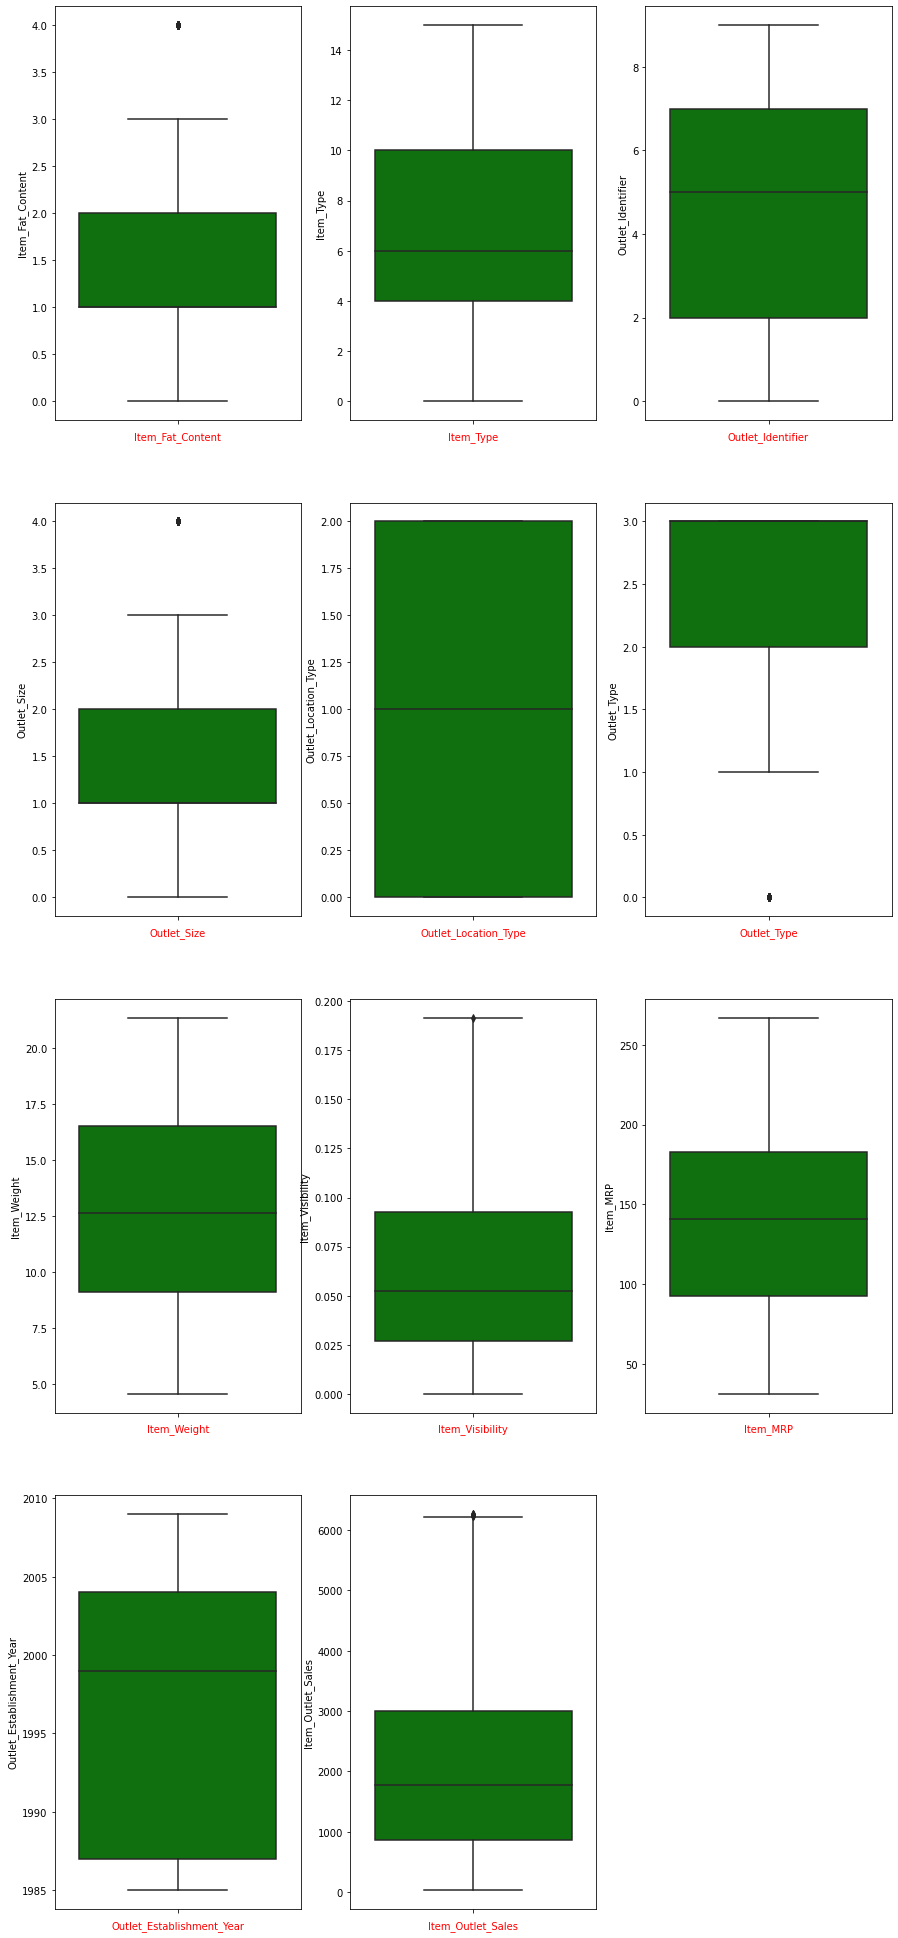

In [900]:
## let's check our data with box plot.

plt.figure(figsize=(15, 35))

graph = 1

for column in clean_data:
    if graph <= 11:
        ax = plt.subplot(4,3,graph)
        sns.boxplot(y = clean_data[column],orient='h',color='green')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()

### From the box plot we can see that there are some outliers. 
### but our feature __Item_Visibility__ and the target __tem_Outlet_Sales__ have more outliers , So let's remobe them.

##### Outlier Dectection Formula
##### Higher side ===> Q3 + (1.5 * IQR)
##### lower side ===> Q1 - (1.5 * IQR)
##### IQR = Inter Quantile Rate = Q3 - Q1

In [901]:
## Find the IQR ( Inter Quantile Range) to identify oulier

# 1st quantile
q1 = clean_data.quantile(0.25)

# 3rd quantile
q3 = clean_data.quantile(0.75)

#IQR 
iqr = q3 - q1

In [902]:
# Validation one outlier
high_item_Vi = (q3.Item_Visibility+ (1.5 * iqr.Item_Visibility))
                
high_item_Vi

0.19159691675

#### This means from the Item_Visibility column records values greater than 0.19 (high_item_Vi > 0.19) are Outliers

In [903]:
indexes = np.where(clean_data['Item_Visibility'] > high_item_Vi)
indexes

(array([3278]),)

### let's drop those records.

In [904]:
clean_data = clean_data.drop(clean_data.index[indexes])

In [905]:
## reset the index

clean_data.reset_index(drop=True)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,1,4,9,1,2.0,3.0,9.300,0.016047,249.8092,1999,3735.1380
1,2,14,3,2,0.0,2.0,5.920,0.019278,48.2692,2009,443.4228
2,1,10,9,1,2.0,3.0,17.500,0.016760,141.6180,1999,2097.2700
3,2,6,0,2,0.0,0.0,19.200,0.000000,182.0950,1998,732.3800
4,1,9,1,1,0.0,3.0,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8138,1,13,1,1,0.0,3.0,6.865,0.056783,214.5218,1987,2778.3834
8139,2,0,7,2,1.0,3.0,8.380,0.046982,108.1570,2002,549.2850
8140,1,8,6,1,1.0,3.0,10.600,0.035186,85.1224,2004,1193.1136
8141,2,13,3,2,0.0,2.0,7.210,0.145221,103.1332,2009,1845.5976


In [906]:
indexes = np.where(clean_data['Item_Outlet_Sales'] > (q3.Item_Outlet_Sales + (1.5 * iqr.Item_Outlet_Sales)))
clean_data =clean_data.drop(clean_data.index[indexes])
clean_data.reset_index(drop=True)


,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,1,4,9,1,2.0,3.0,9.300,0.016047,249.8092,1999,3735.1380
1,2,14,3,2,0.0,2.0,5.920,0.019278,48.2692,2009,443.4228
2,1,10,9,1,2.0,3.0,17.500,0.016760,141.6180,1999,2097.2700
3,2,6,0,2,0.0,0.0,19.200,0.000000,182.0950,1998,732.3800
4,1,9,1,1,0.0,3.0,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8131,1,13,1,1,0.0,3.0,6.865,0.056783,214.5218,1987,2778.3834
8132,2,0,7,2,1.0,3.0,8.380,0.046982,108.1570,2002,549.2850
8133,1,8,6,1,1.0,3.0,10.600,0.035186,85.1224,2004,1193.1136
8134,2,13,3,2,0.0,2.0,7.210,0.145221,103.1332,2009,1845.5976


### let's verify whether the outliers are removed.

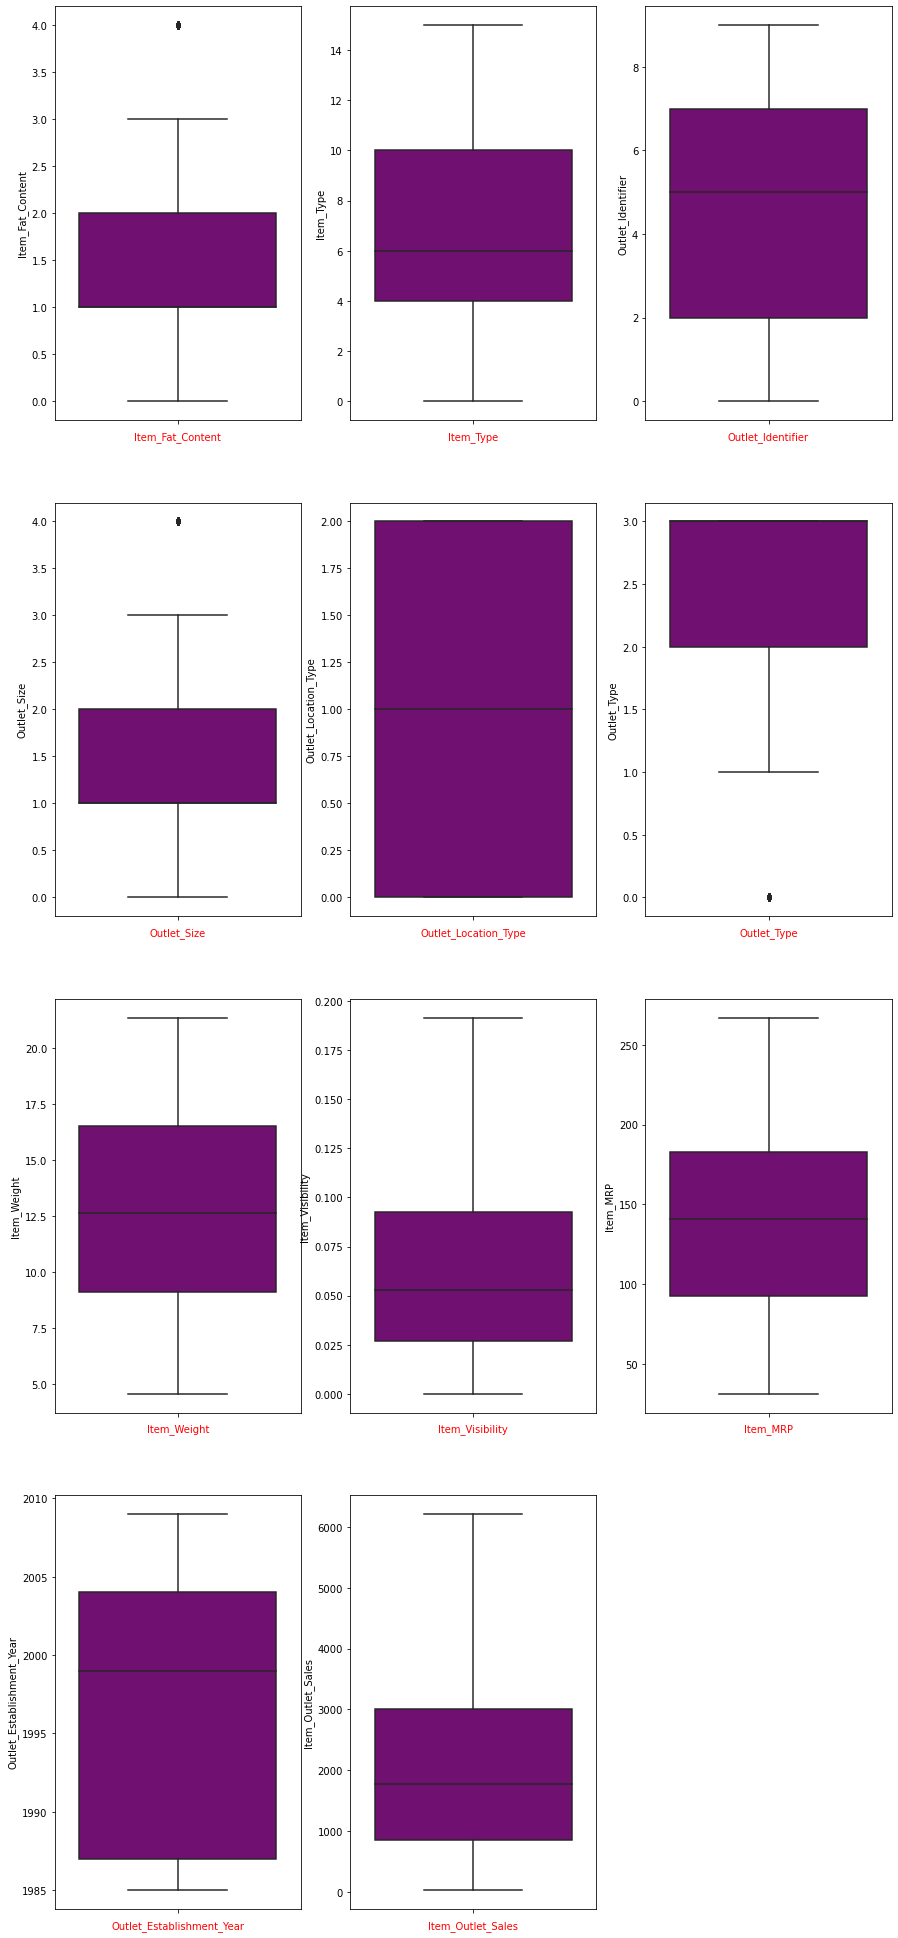

In [907]:
## let's check our data with box plot.

plt.figure(figsize=(15, 35))

graph = 1

for column in clean_data:
    if graph <= 11:
        ax = plt.subplot(4,3,graph)
        sns.boxplot(y = clean_data[column],orient='h',color='purple')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()

### we can see that the outliers are remove from the both columns.

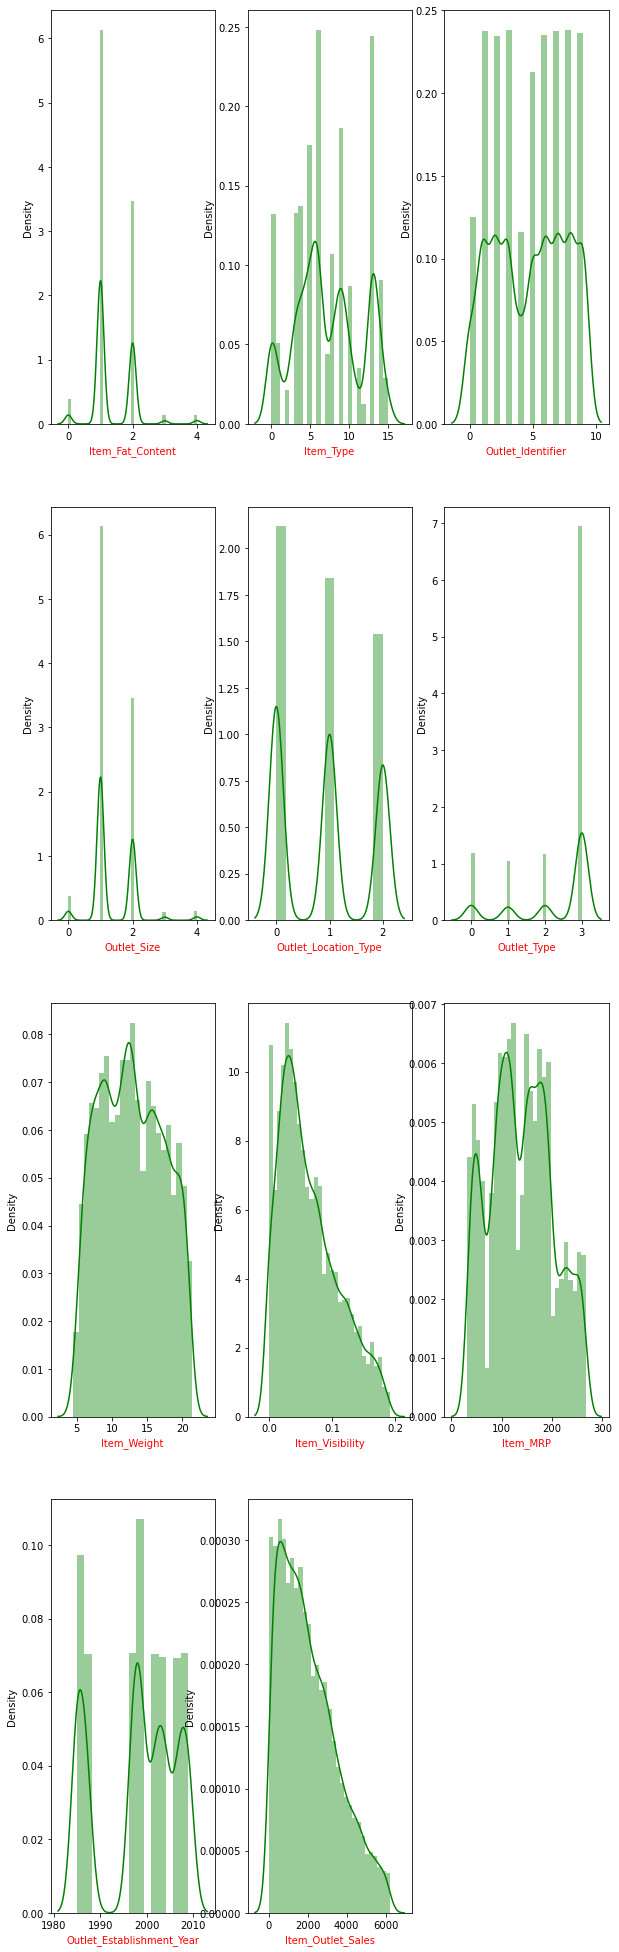

In [908]:
plt.figure(figsize=(10, 35))

graph = 1

for column in clean_data:
    if graph <= 11:
        ax = plt.subplot(4,3,graph)
        sns.distplot(clean_data[column],color='green')
        plt.xlabel(column,color ='r',fontsize = 10)
    graph+=1
plt.show()

### From distplot we can see the skewness also removed and our dataset look better than before.

### let's again build the model and check the accuracy

In [959]:
X = clean_data.drop(['Item_Outlet_Sales'],axis=1)
Y = clean_data.Item_Outlet_Sales

In [960]:
## let's standarize our features data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [973]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.30,random_state=115)

In [974]:
lr_ = LinearRegression()

In [975]:
lr_.fit(x_train, y_train)

LinearRegression()

#### Let's evaluate the model.

In [976]:
y_predlr_ = lr_.predict(x_test)

In [977]:
mean_absolute_error(y_test,y_predlr_)


819.0782842158753

In [978]:
print('\n*****Accuracy ****\n')

print(metrics.r2_score(y_test,y_predlr_))


*****Accuracy ****

0.47836299736216414


## let's buld second model usin Lasso Algorithum

In [979]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV


In [980]:
lasscv = LassoCV(alphas=None, max_iter=2000, normalize=True)
lasscv.fit(x_train, y_train)


LassoCV(max_iter=2000, normalize=True)

In [981]:
alpha =lasscv.alpha_
alpha

0.0333155816050429

In [982]:
## now that we have the best parameter, let's use Lasso regression
## and see how well our data fitted  before 

lasso_reg = Lasso(alpha=0.03)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.03)

#### Let's evaluate the model

In [983]:
lasso_reg.score(x_test, y_test)


0.478364251615617

In [984]:
y_predlass = lasso_reg.predict(x_test)

In [985]:
print('\n*****Accuracy ****\n')

print(metrics.r2_score(y_test, y_predlass))


*****Accuracy ****

0.478364251615617


### We built a second model using lasso and we got accuracy is 0.47%

## Let's the build the third model using  Ridge regression Algorithum

In [986]:
# RidgeCV will return best alpha and coefficients after perfoming
#### 10 across validations.

ridgecv = RidgeCV(alphas= np.arange(0.001,0.1,0.01), normalize=True)

ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [987]:
alpha1 = ridgecv.alpha_
alpha1

0.001

#### The result is alpha1 = 0.001, It is called learning rate.

In [988]:
ridge_model = Ridge(alpha1)

## ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [989]:
ridge_model.score(x_test, y_test)


0.47836300136298715

In [990]:
y_predrige = ridge_model.predict(x_test)

In [991]:
print('\n*****Accuracy ****\n')

print(metrics.r2_score(y_test,y_predrige ))


*****Accuracy ****

0.47836300136298715


## We built a second model using Ridge and we got accuracy is 0.47%


## Let's go for cross validation score and see if there no overfitting and wich model performe well.

In [992]:
from sklearn.model_selection import cross_val_score


In [993]:
## first model lr_

scr = cross_val_score(lr_,X,Y,cv=7)
print('Cross Validation Score of LinearRegression model:',scr.mean())

Cross Validation Score of LinearRegression model: 0.47001298089941834


In [994]:
## second model lasso_reg

scr = cross_val_score(lasso_reg,X,Y,cv=7)
print('Cross Validation Score of Lasso model:',scr.mean())


Cross Validation Score of Lasso model: 0.47001259695385217


In [995]:
## second model lasso_reg

scr = cross_val_score(ridge_model,X,Y,cv=7)
print('Cross Validation Score of Ridge model:',scr.mean())


Cross Validation Score of Ridge model: 0.4700129867210329


#### let's check the defferences of model accuracy and cross_val_score each model.

In [996]:
print('\nLinearRegression model diff is:',47.8 -47)
print('\nLasso model diff is:',47.8 -47)
print('\nRidge  model diff is:',47.8 -47)



LinearRegression model diff is: 0.7999999999999972

Lasso model diff is: 0.7999999999999972

Ridge  model diff is: 0.7999999999999972


### The defference of accuracy and cross validation score of all the 3 models are same. 

## So let's choose the Lasso Model and go for Hyper parameter turning.

In [997]:
from sklearn.model_selection import GridSearchCV

In [1000]:
lasso = Lasso(random_state=0, max_iter=1000)
alphas = np.logspace(-4, -0.5, 50)

tuned_parameters = [{'alpha': alphas}]
n_folds = 7

In [1001]:
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=Lasso(random_state=0),
             param_grid=[{'alpha': array([1.00000000e-04, 1.17876863e-04, 1.38949549e-04, 1.63789371e-04,
       1.93069773e-04, 2.27584593e-04, 2.68269580e-04, 3.16227766e-04,
       3.72759372e-04, 4.39397056e-04, 5.17947468e-04, 6.10540230e-04,
       7.19685673e-04, 8.48342898e-04, 1.00000000e-03, 1.17876863e-03,
       1.38949549e-03, 1.63789371e-03, 1....
       5.17947468e-03, 6.10540230e-03, 7.19685673e-03, 8.48342898e-03,
       1.00000000e-02, 1.17876863e-02, 1.38949549e-02, 1.63789371e-02,
       1.93069773e-02, 2.27584593e-02, 2.68269580e-02, 3.16227766e-02,
       3.72759372e-02, 4.39397056e-02, 5.17947468e-02, 6.10540230e-02,
       7.19685673e-02, 8.48342898e-02, 1.00000000e-01, 1.17876863e-01,
       1.38949549e-01, 1.63789371e-01, 1.93069773e-01, 2.27584593e-01,
       2.68269580e-01, 3.16227766e-01])}],
             refit=False)

In [1002]:
clf.best_params_

{'alpha': 0.31622776601683794}

In [1003]:
## now that we have the best parameter, let's use Lasso regression
## and see how well our data fitted  before 

lasso_reg = Lasso(alpha=0.31)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.31)

In [1004]:
y_predls = lasso_reg.predict(x_test)

In [1005]:
print('\n*****Accuracy ****\n')

print(metrics.r2_score(y_test,y_predls))


*****Accuracy ****

0.4783753735079448


### We build 3 models and after paramter turning we got the same accuracy 47%.

#### saving the model.

In [1006]:
import joblib

In [1007]:
joblib.dump(lasso_reg,'Item_sales_prediction.pkl')

['Item_sales_prediction.pkl']

#### *********************************************************************************
#### *********************************************************************************



### Let's Loading the saved model

In [1008]:
model = joblib.load('Item_sales_prediction.pkl')

In [1010]:
## importing the clearned test data 

test = pd.read_csv('test_data_cleaned.csv')

In [1011]:
test.head(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1,13,9,1,2.0,3.0,20.75,0.007565,107.8622,1999
1,4,4,2,4,1.0,3.0,8.30,0.038428,87.3198,2007


#### Let's do the prediction

In [1012]:
prediction = model.predict(test)

In [1013]:
prediction[0]

-300573.84887216537

## let's save the prediction

In [1014]:
pred = pd.DataFrame(prediction) ## converting into Data Frame

In [1015]:
pred.to_csv('label_prediction.csv',index=False)